Loading Titanic data from Seaborn...
Initial shape: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Correlation Heatmap:


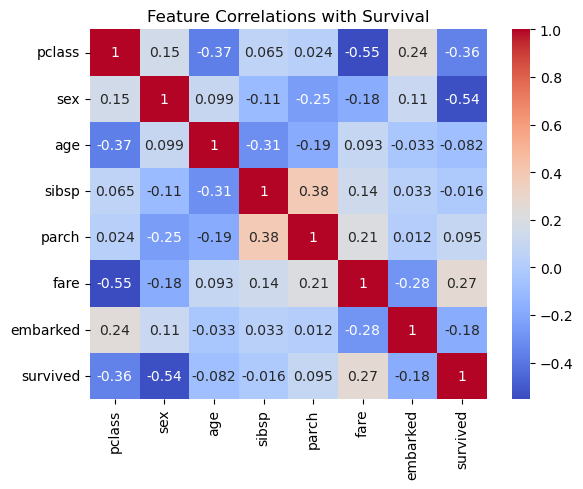

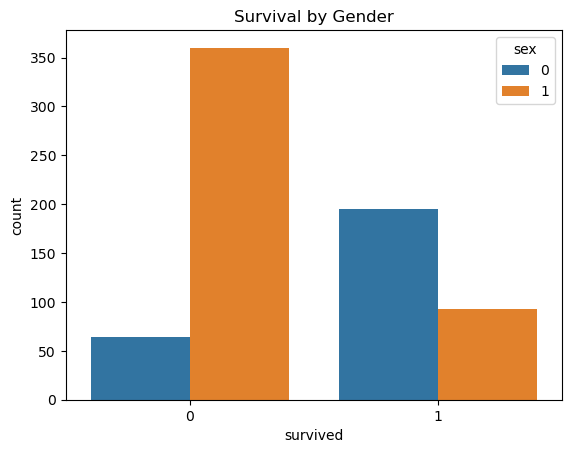


Training Logistic Regression
Logistic Regression Accuracy:  0.7972027972027972
Confusion Matrix:
 [[73  7]
 [22 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143


Training Perceptron...
Perceptron Accuracy:  0.6783216783216783
Confusion Matrix:
 [[48 32]
 [14 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68        80
           1       0.60      0.78      0.68        63

    accuracy                           0.68       143
   macro avg       0.69      0.69      0.68       143
weighted avg       0.70      0.68      0.68       143



In [5]:
# Titanic Dataset

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# --1. Load dataset -- 
print("Loading Titanic data from Seaborn...")
df = sns.load_dataset("titanic")

# --2. Initial Inspection --
print(f"Initial shape:", df.shape)
print(df.head())

# --3. Drop some columns tghat we don't need or could cause problems (NaN)
df = df.drop(columns=["deck", "embark_town", "alive", "who", "class"])

# --4. Drop rows with too much missing data
df = df.dropna(subset=["age", "embarked", "sex"])

# --5. Encode categorical columns 
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])  # male = 1, female =0
df["embarked"] = le.fit_transform(df["embarked"]) # C, Q, S -> numbers

# --6. Define features and target
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
X = df[features]
y = df["survived"]

# --7. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --8. Exploratory Data Look
print("\nCorrelation Heatmap:")
sns.heatmap(df[features + ["survived"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations with Survival")
plt.show()

sns.countplot(x="survived", hue="sex", data=df)
plt.title("Survival by Gender")
plt.show()

# --9. Logistic Regression
print("\nTraining Logistic Regression")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# --10. Perceptron
print("\nTraining Perceptron...")
percep = Perceptron(max_iter=1000, eta0=1.0, random_state=42)
percep.fit(X_train, y_train)
y_pred_percep = percep.predict(X_test)

print("Perceptron Accuracy: ", accuracy_score(y_test, y_pred_percep))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_percep))
print("Classification Report:\n", classification_report(y_test, y_pred_percep))
